# Deepregression Summary


# Motivation

Classical approaches struggle with large numbers of observations or features because modeling full distributions adds complexity beyond mean regression. By reformulating the task within a neural network framework, deepregression combines structured additive models with deep learning, allowing users to efficiently estimate full distributional parameters in high-dimensional or large-scale problems.

# Model

The Model consist of three additive components. The predictors are (i) penalized linear effects, (ii) penalized smooth effects and (iii) unstructured neural networks.

$$
\eta_k \equiv \eta_k(x, z, u) 
= x^\top w 
+ \sum_{j=1}^J f_{k,j}(z) 
+ \sum_{l=1}^L d_{k,l}(u).
$$

**Explanation of components:**

- **$\eta_k$**: additive predictor for the $k$-th distributional parameter (e.g., mean, variance).  
- **$x^\top w$**: linear effects of covariates $x$ with coefficients $w$ (penalized linear regression terms).  
- **$\sum_{j=1}^J f_{k,j}(z)$**: smooth effects of features $z$, where $f_{k,j}$ are smooth functions (e.g., B-splines) capturing nonlinear relationships.  
- **$\sum_{l=1}^L d_{k,l}(u)$**: contributions from neural network predictors $d_{k,l}$ applied to features $u$, allowing flexible and unstructured representations.

**Important note:**  
The inputs $x, z, u$ are allowed to **overlap across components**. Normally this would create an **identifiability problem** (since the same feature could influence multiple terms). In SDDR, this is addressed through a dedicated **orthogonalization cell**, which ensures components remain identifiable and interpretable.  


**Model and mappings**

$$
Y \mid x,z,u \sim \mathcal{D}(\theta_1,\ldots,\theta_K)
$$

$$
(x,z,u)\ \xrightarrow{(1)}\ \eta_k(x,z,u)\ \xrightarrow{h_k}\ \theta_k=h_k(\eta_k)\ \xrightarrow{}\ \mathcal{D}(\theta_1,\ldots,\theta_K).
$$

with
$$
\eta_k(x,z,u)=x^\top w+\sum_{j=1}^J f_{k,j}(z)+\sum_{\ell=1}^{L} d_{k,\ell}(u).
$$

**One-sentence step explanations**

- **(1) Features → additive predictor \(\eta_k\):**
- **Link \(h_k\):** map the real-valued \(\eta_k\) into the valid parameter space \(\Theta_k\) (e.g., \(\exp\) for positive scales).  
- **Assemble \(\theta_1,\dots,\theta_K\):** these parameters specify the target parametric distribution \(\mathcal{D}\) for \(Y\).




## Orthogonalizational cell

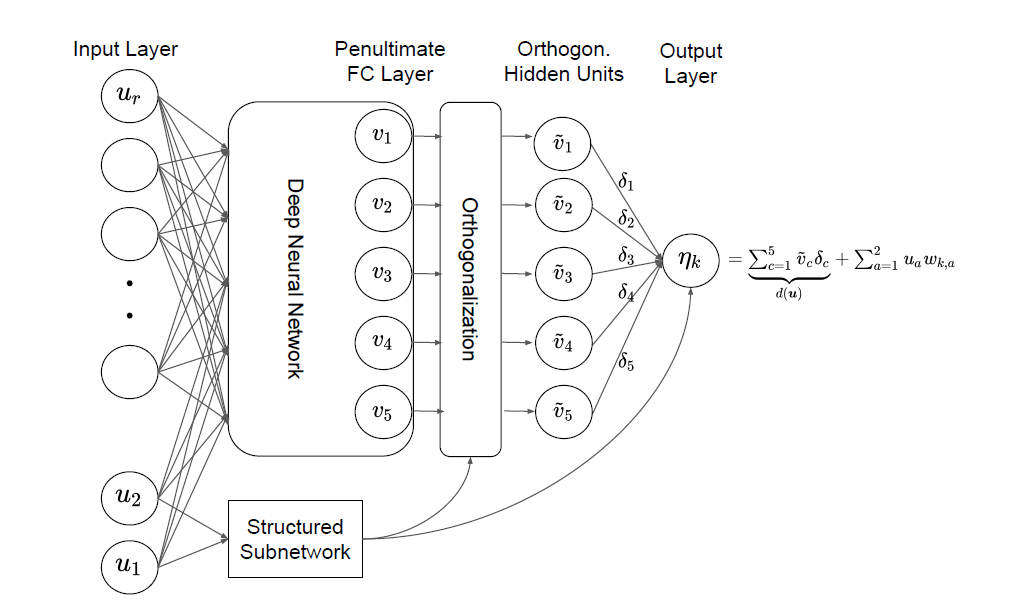

 
Before passing forward, the NN contributions $d_{k,l}(u)$ are projected to be **orthogonal** to the structured components (linear + smooth).  
This enforces that the NN part only captures **residual variation**, ensuring **identifiability** and **interpretability**.


# Further Reading

Further details need to be summarized when decided on the exact use of the paper.

# Questions

- Are we really interested in distributional regression in order to predict necessity of chest tube placement?

- We could use the package, but would have to think about an approach to include our 3D and 2D images